In [52]:
%matplotlib inline

# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt

## Parte 1 (imágenes en /white_patch y /coord_cromaticas):

### 1. Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste.

In [53]:
# Cargar la imagen color
imagen  = cv.imread('CoordCrom_1.png')
imgRGB = cv.cvtColor(imagen, cv.COLOR_BGR2RGB)
imagen1 = cv.imread('CoordCrom_2.png')
img1RGB = cv.cvtColor(imagen1, cv.COLOR_BGR2RGB)
imagen2 = cv.imread('CoordCrom_3.png')
img2RGB = cv.cvtColor(imagen2, cv.COLOR_BGR2RGB)



In [54]:
imagen.shape

(996, 908, 3)

In [55]:
def cromatic_matriz(imagen):
    
    matriz_xyz=np.array([[0.4124,0.3576, 0.1805],
                         [0.2126, 0.7152, 0.0722],
                         [0.0193, 0.1192, 0.9505]])
    
    #matriz de la imagen
    img_matriz=np.empty((imagen.shape[0], imagen.shape[1],3))
    #evaluar condición para evitar que se divida por cero
    b=np.array([[0],
                [0],
                [0]])
    #recorre la matriz de la imagen
    for j in range(imagen.shape[1]):
        for i in range(imagen.shape[0]):
            #a es una varible usada para aplicar la compración con b
            a=imagen[i][j].reshape(3,1)
            if np.array_equal(a, b):
                #para evitar la división por cero 
                a=np.array([[1],[1],[1]])
            else:
                X,Y,Z=np.ravel(np.dot(matriz_xyz,a))
                den=X+Y+Z
                img_matriz[i][j]=[(X/den),(Y/den),(Z/den)]

    # Escalar las coordenadas cromáticas al rango de 0-255
    img_matriz = (img_matriz * 255).astype(np.uint8)

    # Convertir las coordenadas cromáticas a RGB
    img_rgb = cv.cvtColor(img_matriz, cv.COLOR_XYZ2RGB)

    
    fig, axs = plt.subplots(1, 2)
    axs[0].imshow(imagen)
    axs[0].set_title('Imagen original')

    axs[1].imshow(img_rgb)
    axs[1].set_title('Imagen con algoritmo')

    return None
    


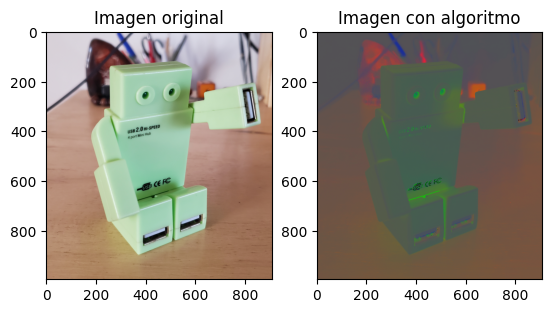

In [56]:
cromatic_matriz(imgRGB)

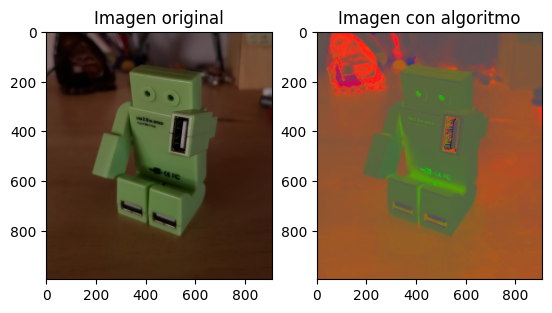

In [57]:
cromatic_matriz(img1RGB)

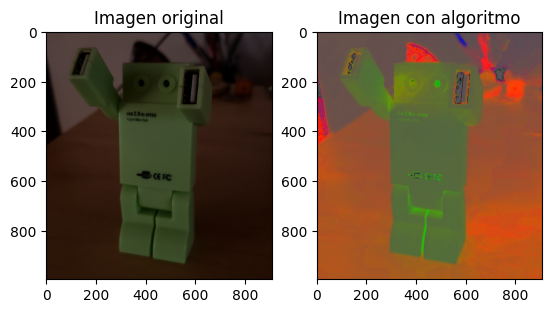

In [58]:
cromatic_matriz(img2RGB)

### 2. Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.

In [59]:
imagen_1=cv.imread('test_blue.png')
imagen_2=cv.imread('test_green.png')
imagen_3=cv.imread('test_red.png')

In [60]:
def white_patch(imagen):

    imagen = cv.cvtColor(imagen, cv.COLOR_BGR2RGB)

    fig, axs = plt.subplots(1, 2)
    axs[0].imshow(imagen)
    axs[0].set_title('Imagen original')

    for k in range (0,imagen.shape[2]):

        c=imagen[:,:,k].max()
        
        for i in range(0,imagen.shape[0]):
            for j in range(0,imagen.shape[1]):
                imagen[i][j][k]=(255/c)*imagen[i][j][k]
    
    
    axs[1].imshow(imagen)
    axs[1].set_title('Imagen con algoritmo')

    plt.show()
    return None

### 3. Mostrar los resultados obtenidos y analizar las posibles fallas (si es que las hay) en el caso de White patch.

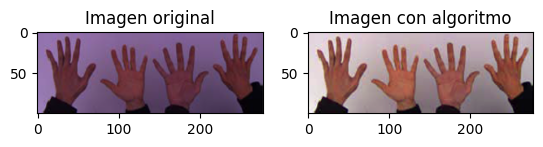

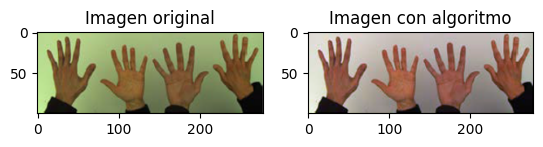

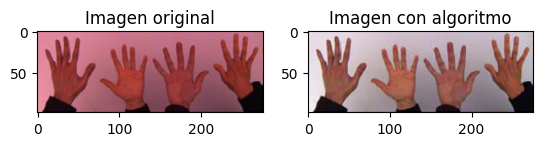

In [61]:
white_patch(imagen_1)
white_patch(imagen_2)
white_patch(imagen_3)

In [62]:
img_wp_blue=cv.imread("wp_blue.jpg")
img_wp_green=cv.imread("wp_green.png")
img_wp_green2=cv.imread("wp_green2.jpg")
img_wp_red=cv.imread("wp_red.png")
img_wp_red2=cv.imread("wp_red2.jpg")


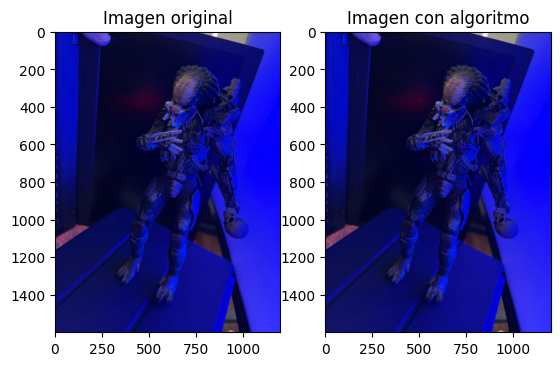

In [63]:
white_patch(img_wp_blue)

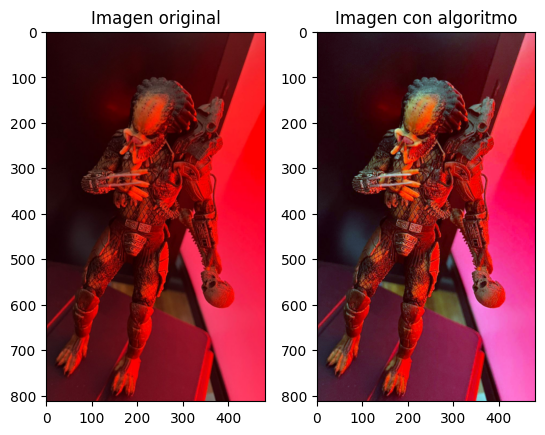

In [64]:
white_patch(img_wp_red)

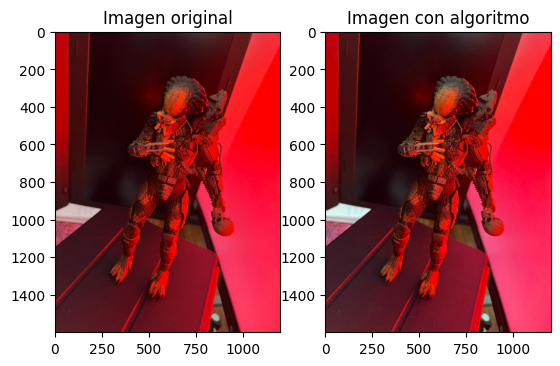

In [65]:
white_patch(img_wp_red2)

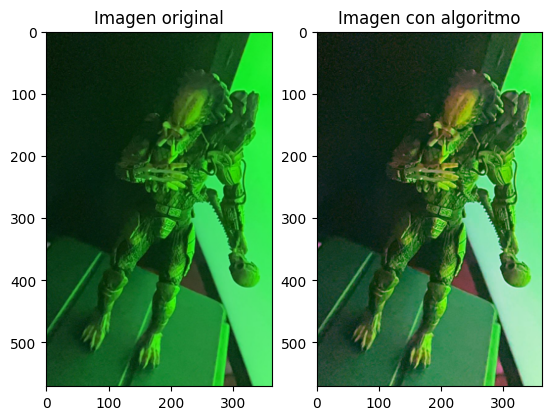

In [66]:
white_patch(img_wp_green)

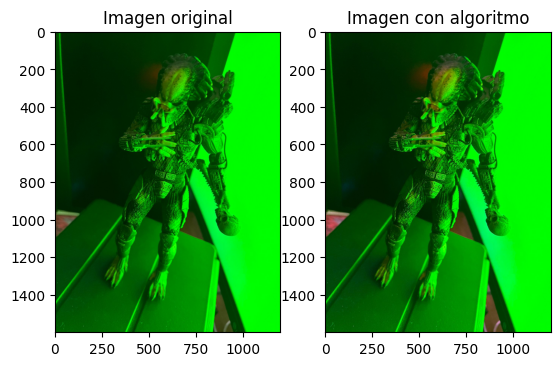

In [67]:
white_patch(img_wp_green2)

## Parte 2

### 1. Para las imágenes img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grisas y visualizarlas.

In [92]:
img_2_1 = cv.imread('img1_tp.png', cv.IMREAD_GRAYSCALE)
img_2_2 = cv.imread('img2_tp.png', cv.IMREAD_GRAYSCALE)

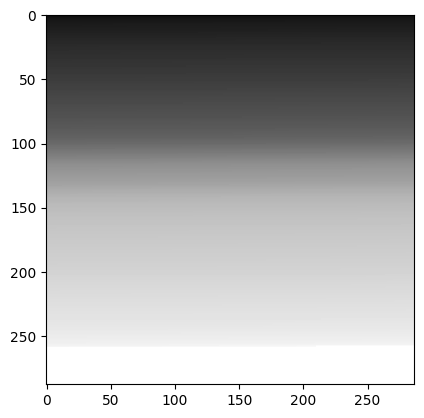

In [93]:
plt.imshow(img_2_1, cmap="gray")

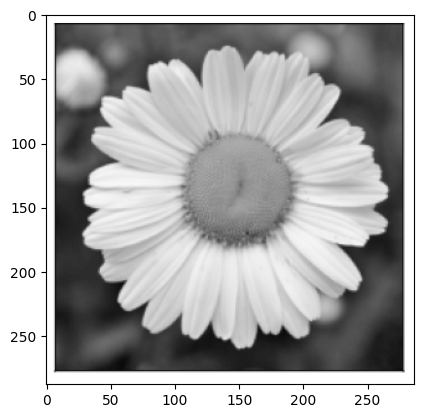

In [94]:
plt.imshow(img_2_2, cmap="gray")

### 2. Elija el numero de bins que crea conveniente y grafique su histograma, compare los histogramas entre si. Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes, considera que puede ser de utilidad tomar como ‘features’ a los histogramas?

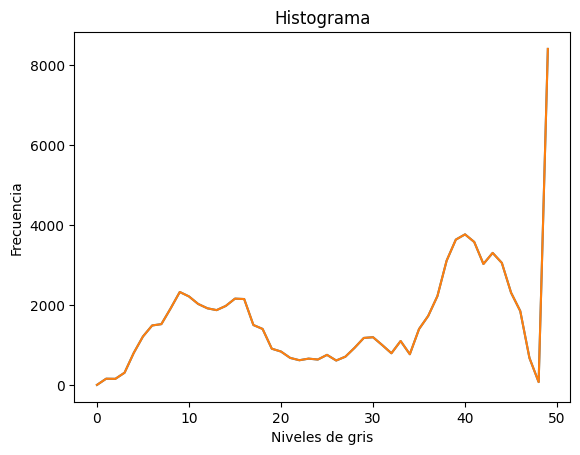

In [110]:
# Calcular el histograma
hist1,bins1 = np.histogram(img_2_1.ravel(),50,[0,256])
plt.plot(hist1)

# Mostrar el histograma
plt.plot(hist1)
plt.title('Histograma')
plt.xlabel('Niveles de gris')
plt.ylabel('Frecuencia')
plt.show()

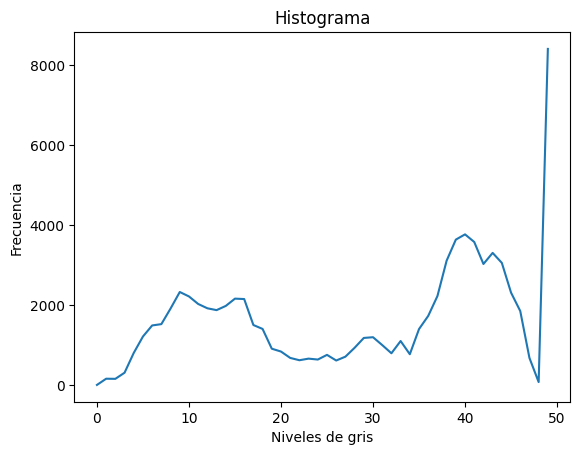

In [111]:
# Calcular el histograma
hist2,bins2 = np.histogram(img_2_2.ravel(),50,[0,256])

# Mostrar el histograma
plt.plot(hist2)
plt.title('Histograma')
plt.xlabel('Niveles de gris')
plt.ylabel('Frecuencia')
plt.show()

#### la representación en el histograma es casi la misma, esto se debe a que representa información estadistica de la imagen. Podria utilizarse para detectar o clasificar objetos en un entorno controlado, donde quiza se pueda hacer una clasificación dependiendo de la intensidad del objeto

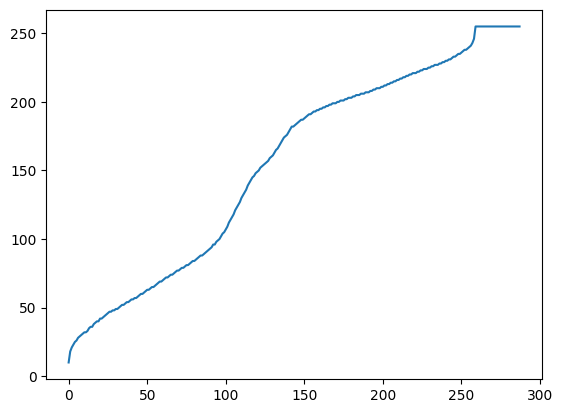

In [106]:
plt.plot(img_2_1[:,150])

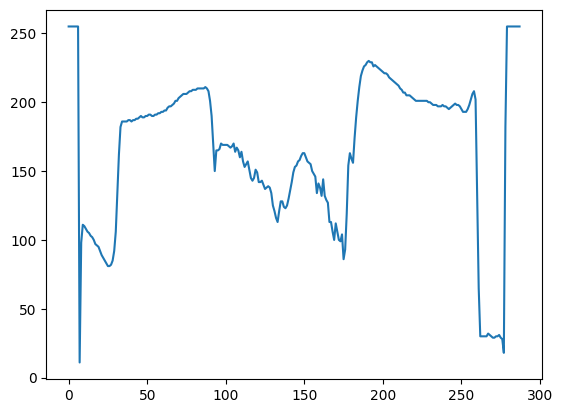

In [107]:
plt.plot(img_2_2[:,150])

### 3. Para la imagen segmentacion.png analice el histograma de los canales RGB. Segmente algunos de los elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando mascaras, las regiones en imágenes separadas.

In [76]:
imagen = cv.imread('segmentacion.png')
imgRGB = cv.cvtColor(imagen, cv.COLOR_BGR2RGB)
imgHSV = cv.cvtColor(imagen, cv.COLOR_BGR2HSV)

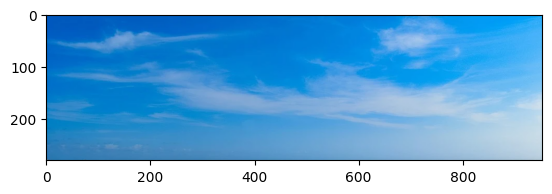

In [77]:
#Defino la muestra para el cielo
cielo_muestra = imgRGB[:280,:,:]
plt.figure(2)
plt.imshow(cielo_muestra)
plt.show()

Text(0.5, 1.0, 'Mascara')

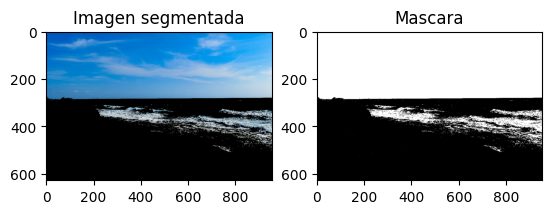

In [78]:
color_mean, color_std = cv.meanStdDev(cielo_muestra)

# Pintemos de blanco los puntos que estén cerca de la media en un radio menor que 3 sigmas
# para ¨capturar¨ el 99.7 % de pixeles.
n_sigma = 3
cielo_mask = cv.inRange(imgRGB, color_mean-color_std * n_sigma,  color_mean+color_std * n_sigma)
cielo_segmentado = cv.bitwise_and(imgRGB, imgRGB, mask=cielo_mask)

plt.subplot(1, 2, 1)
plt.imshow(cielo_segmentado)
plt.title("Imagen segmentada")

plt.subplot(1, 2, 2)
plt.imshow(cielo_mask,cmap='gray')
plt.title("Mascara")

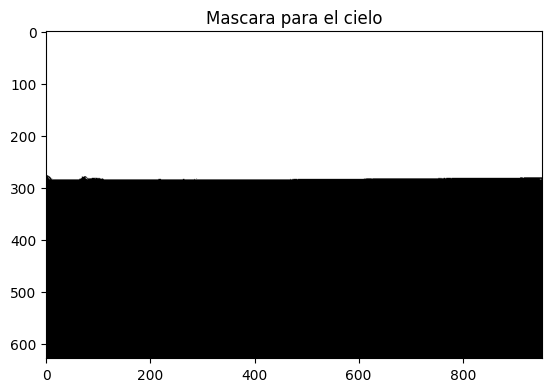

In [79]:
#defino que apartir de la fila 285 hacia abajo seran ceros
cielo_mask[285:,:]=0
cielo_segmentado = cv.bitwise_and(imgRGB, imgRGB, mask=cielo_mask)
plt.figure()
plt.imshow(cielo_mask,cmap="gray")
plt.title("Mascara para el cielo")
plt.show()

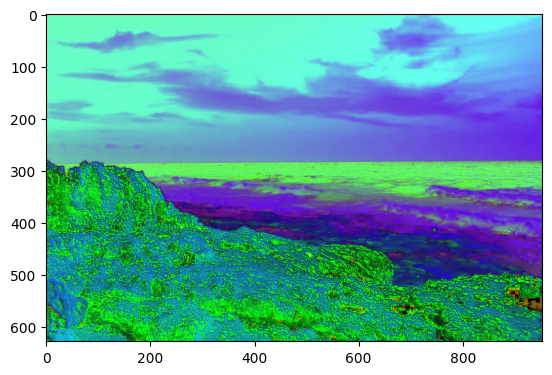

In [80]:
#explorar rango de color en HSV para elegir el rango de H, con el fin seleccionar segmentar la tierra
plt.figure()
plt.imshow(imgHSV)
plt.show()

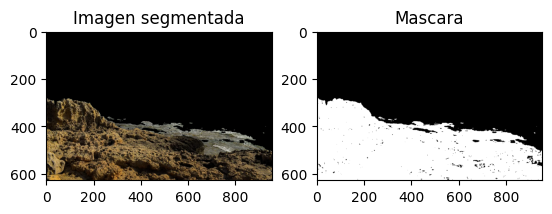

In [81]:
#Defino el rango de colores segun la exploración
color_l = (0,0,0)
color_u = (50,255,255)

tierra_mask = cv.inRange(imgHSV, color_l,  color_u)
tierra_segmentada = cv.bitwise_and(imgRGB, imgRGB, mask=tierra_mask)

plt.subplot(1, 2, 1)
plt.imshow(tierra_segmentada)
plt.title("Imagen segmentada")

plt.subplot(1, 2, 2)
plt.imshow(tierra_mask,cmap='gray')
plt.title("Mascara")

plt.show()

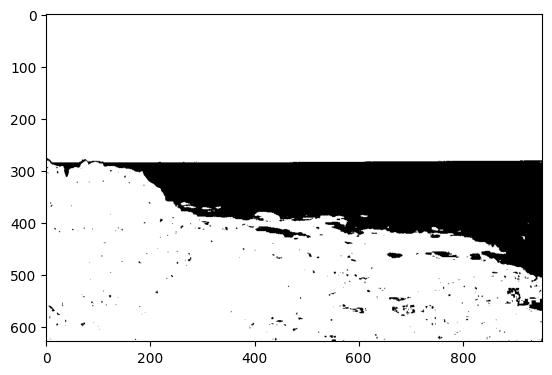

In [82]:
#Defino la mascara del mar apartir de las otras dos mascaras
mar_mask=tierra_mask+cielo_mask
plt.figure()
plt.imshow(mar_mask,cmap="gray")
plt.show()

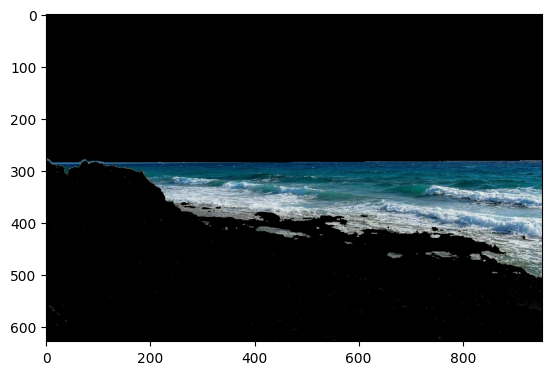

In [83]:
#defino el segmento del mar con la negación de la mascara creada para el mar
mar_segmentada = cv.bitwise_and(imgRGB, imgRGB, mask=~mar_mask)
plt.figure()
plt.imshow(mar_segmentada)
plt.show()

Text(0.5, 1.0, 'Tierra segmentada')

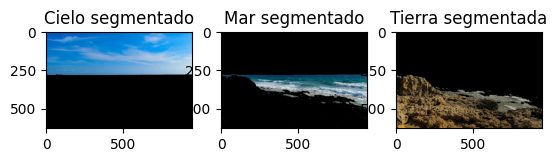

In [84]:
plt.subplot(2, 3, 1)
plt.imshow(cielo_segmentado)
plt.title("Cielo segmentado")

plt.subplot(2, 3, 2)
plt.imshow(mar_segmentada)
plt.title("Mar segmentado")

plt.subplot(2, 3, 3)
plt.imshow(tierra_segmentada)
plt.title("Tierra segmentada")